In [1]:
import pandas as pd
import numpy as np
import sklearn
import re
import wordcloud
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer  
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
df = pd.read_csv("cleaned_review_sorted_withoutNA.csv")

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,text,stars,label
0,432267,432267,order lunch husband order incorrect not sure o...,2.0,Negative
1,313341,313341,part large group food service ok think odd thr...,3.0,Negative
2,313339,313339,order burgers friends feel apart buffalo fry t...,2.0,Negative
3,667740,667740,not come hurry lunch break stand counter min s...,2.0,Negative
4,313336,313336,con extra fro sprinkle machine show total bill...,1.0,Negative


In [5]:
def feature_extraction(data, vec_type= "tfidf", stopwords = "english" , ngram_range = (1,1), max_features= None ):
    if vec_type == "bow":
        from sklearn.feature_extraction.text import CountVectorizer
        vectorizer = CountVectorizer( stop_words = stopwords, ngram_range = ngram_range, max_features = max_features)
        vec = vectorizer.fit_transform(data)
    if vec_type =="tfidf":
        from sklearn.feature_extraction.text import TfidfVectorizer
        vectorizer = TfidfVectorizer(sublinear_tf=True, stop_words = stopwords, ngram_range= ngram_range, max_features = max_features)
        vec = vectorizer.fit_transform(data)        
    return (vectorizer,vec)

In [10]:
df.iloc[325061:325063,:]

,Unnamed: 0,Unnamed: 0.1,text,stars,label
325061,172235,172235,get order right service fine food inedible ive...,1.0,Negative
325062,590998,590998,come bite not review best dough phoenix metro ...,5.0,Positive


In [6]:
# choose 10000 features to reduce the time for calculating the weight for wordcloud
text = df["text"]
feature = feature_extraction(text,vec_type = "tfidf",ngram_range = (1,1),max_features = 10000)# change to ngram_range = (2,2)   /(3,3)/(1,2)
X = feature[1]
vectorizer = feature[0]

In [7]:
X_neg = X[:325062,:]

In [8]:
X_pos = X[325062:,:]

In [9]:
def freq_calculator(X,vectorizer):
    freq = [(word, X.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
    freq_dict = {}
    for i in range(len(freq)):
        freq_dict[freq[i][0]] = freq[i][1]
    return(freq_dict)

In [16]:
freq_dict = freq_calculator(X_pos,vectorizer)

In [17]:
freq_df = pd.DataFrame(freq_dict.items(),columns = ["word","weight"])
freq_df.to_csv("freq_pos_tfidf_1-gram_10000.csv")

In [57]:
freq_df_pos = pd.read_csv("freq_pos_tfidf_1-gram_10000.csv")

In [60]:
freq_df_pos_50 = freq_df_pos.sort_values(by = "weight", ascending =False).iloc[0:50,:]

In [64]:
freq_dict_pos_50 = freq_df_pos_50.set_index('word')['weight'].to_dict()

In [68]:
del freq_dict_pos_50['order']
del freq_dict_pos_50['food']
del freq_dict_pos_50['place']
del freq_dict_pos_50['come']
del freq_dict_pos_50['pizza']
del freq_dict_pos_50['burger']
del freq_dict_pos_50['love']
del freq_dict_pos_50['great']
del freq_dict_pos_50['good']
del freq_dict_pos_50['best']
del freq_dict_pos_50['like']
del freq_dict_pos_50['really']

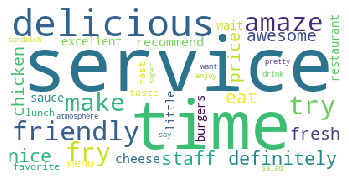

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
w = WordCloud( background_color="white",max_words=50).generate_from_frequencies(freq_dict_pos_50)
plt.imshow(w)
plt.figure(1,figsize=(13, 13))
plt.axis('off')
plt.show()

In [11]:
# word cloud for negative reviews
freq_dict_neg = freq_calculator(X_neg,vectorizer)
freq_df_neg = pd.DataFrame(freq_dict_neg.items(),columns = ["word","weight"])
freq_df_neg.to_csv("freq_neg_tfidf_1-gram_10000.csv")

In [32]:
freq_df_neg = pd.read_csv("freq_neg_tfidf_1-gram_10000.csv")

In [33]:
freq_df_neg_50 = freq_df_neg.sort_values(by = "weight", ascending =False).iloc[0:50,:]

In [52]:
freq_dict_neg_50 = freq_df_neg_50.set_index('word')['weight'].to_dict()

In [35]:
freq_df_neg.head()

,Unnamed: 0,word,weight
0,0,order,13573.232208
1,1,lunch,2716.708345
2,2,husband,1691.391108
3,3,incorrect,371.053438
4,4,sure,2961.661695


In [53]:
del freq_dict_neg_50['order']
del freq_dict_neg_50['food']
del freq_dict_neg_50['good']
del freq_dict_neg_50['like']
del freq_dict_neg_50['place']
del freq_dict_neg_50['come']
del freq_dict_neg_50['say']
del freq_dict_neg_50['pizza']
del freq_dict_neg_50['burger']

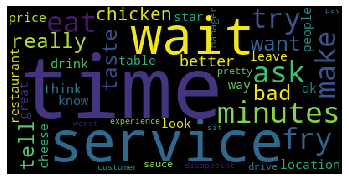

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
w = WordCloud( background_color="black",max_words=50).generate_from_frequencies(freq_dict_neg_50)
plt.imshow(w)
plt.figure(1,figsize=(13, 13))
plt.axis('off')
plt.show()